In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.tree as tree
import pandas as pd
import os

from google.colab import drive


In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#
data = pd.read_csv("/content/drive/MyDrive/MACHINE_LEARNING_FINAL_PROJECT/data.csv", sep=';')  #my csv uses ';' intead of comma (,)


*   Rows= 4424 (students)
*   Columns = 37 (Features)
*   3 feature types = int64, object and float64
*   0 missing values






In [ ]:
print("Shape: ", data.shape) #4424 rows = students, 37 columns = features
print("First 5")
print(data.head())
print("\nFeatures Type: \n", data.dtypes)

Shape:  (4424, 37)
First 5
   Marital status  Application mode  ...   GDP    Target
0               1                17  ...  1.74   Dropout
1               1                15  ...  0.79  Graduate
2               1                 1  ...  1.74   Dropout
3               1                17  ... -3.12  Graduate
4               2                39  ...  0.79  Graduate

[5 rows x 37 columns]

Features Type: 
 Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's o



*   mean for course significantly higher (8856.64) comapred to any other features (2nd highest is 132.61 for previous qualifiaciton grade)
*   Same with STD, 2063 from Course, 13.18 2nd highest for previous qualification grade



        Marital status  Application mode  Application order       Course  Daytime/evening attendance\t  Previous qualification  Previous qualification (grade)  Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Admission grade    Displaced  Educational special needs       Debtor  Tuition fees up to date       Gender  Scholarship holder  Age at enrollment  International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  Curricular units 2nd sem (without evaluations)  Unemployment rate  Inflation rate          GDP    Target
count      4424.000000       4424.000000        4424

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


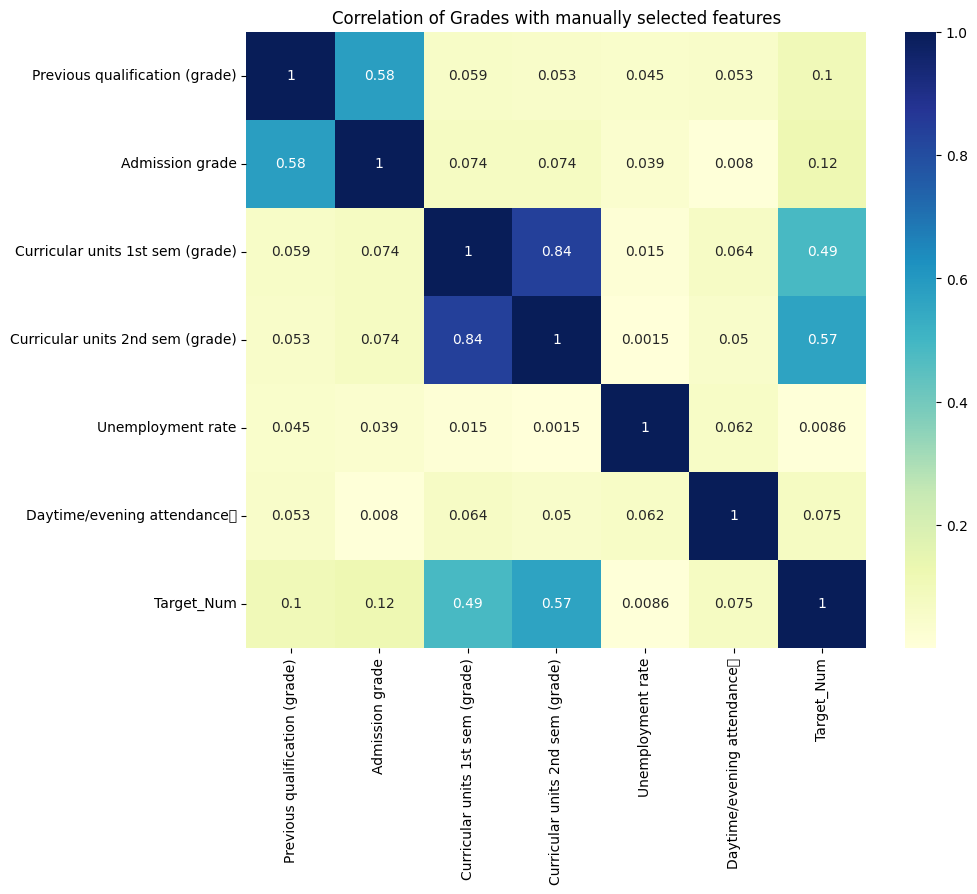

In [ ]:
print(data.describe(include="all").to_string())

copy_data = data.copy()

target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
copy_data['Target_Num'] = copy_data['Target'].map(target_map)

selected_features = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Daytime/evening attendance\t', 'Target_Num', 'Tuition fees up to date', 
]

plt.figure(figsize=(10, 8))
sb.heatmap(copy_data[selected_features].corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation of Grades with manually selected features')
plt.show()




In [ ]:
# all_features = copy_data.drop('Target', axis=1) #removing target cause we have numercal values instead (Target_num)
# plt.figure(figsize=(100,100))
# sb.heatmap(all_features.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix of All Features')
# plt.show()

In [ ]:
missing_data= data.isnull().sum()
print(missing_data)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# **DECISION TREE**


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = copy_data.drop(['Target', 'Target_Num'], axis=1)
y = copy_data['Target_Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
est = DecisionTreeClassifier(max_depth=3, random_state=11)
est.fit(X_train, y_train)

y_pred = est.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7401129943502824


In [ ]:
copy_data[['Target','Target_Num']].drop_duplicates()

,Target,Target_Num
0,Dropout,0
1,Graduate,2
16,Enrolled,1


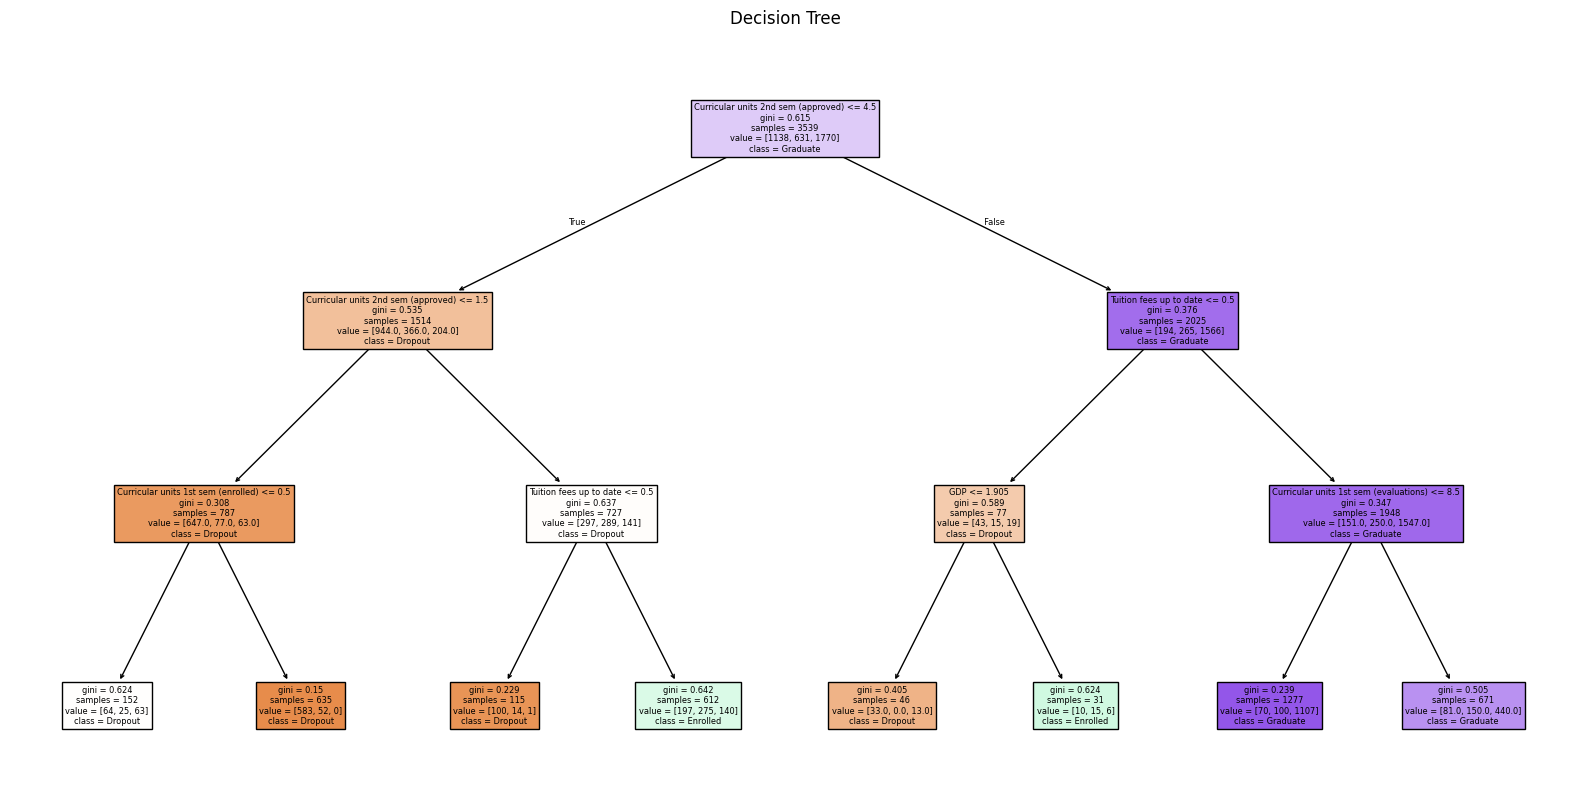

In [ ]:
plt.figure(figsize=(20, 10))
_ = tree.plot_tree(est, filled=True, feature_names=X.columns, class_names=['Dropout', 'Enrolled', 'Graduate'])  #dropout=0, enrolled=1, Gradaute=2
plt.title("Decision Tree")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **PCA**


In [ ]:
#PCA
X = copy_data.drop(['Target', 'Target_Num'], axis=1)
y = copy_data['Target_Num']
#sb.pairplot(data, hue='Target', palette='Set1')
print("X features and its type: \n", X.dtypes)
print("X SHAPE: \n",X.shape)
print("Target \n", y.dtypes)

X features and its type: 
 Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                      

Shape of X_pca:  (4424, 36)
Explined variance ratio:  [0.17666395 0.0988699  0.05862559 0.05585338 0.05259359 0.04674366
 0.04426997 0.04268044 0.03588182 0.03435778 0.03020783 0.02811538
 0.02743125 0.02594951 0.02422388 0.02257108 0.0219562  0.0202338
 0.01769753 0.01629888 0.01565796 0.01479086 0.01285    0.01261176
 0.0115096  0.01068492 0.00883481 0.00666405 0.00576262 0.00528354
 0.00469769 0.0029027  0.00254255 0.0024184  0.00098481 0.00057831]
Cumulative_varinace:  [0.17666395 0.27553384 0.33415943 0.39001281 0.44260641 0.48935007
 0.53362003 0.57630048 0.6121823  0.64654008 0.67674791 0.70486329
 0.73229454 0.75824405 0.78246793 0.80503901 0.82699521 0.84722901
 0.86492654 0.88122542 0.89688339 0.91167424 0.92452424 0.937136
 0.94864561 0.95933052 0.96816533 0.97482939 0.980592   0.98587555
 0.99057323 0.99347593 0.99601848 0.99843688 0.99942169 1.        ]
Number of components for 96% variance: 27
Shape of final X_pca (4424, 27)



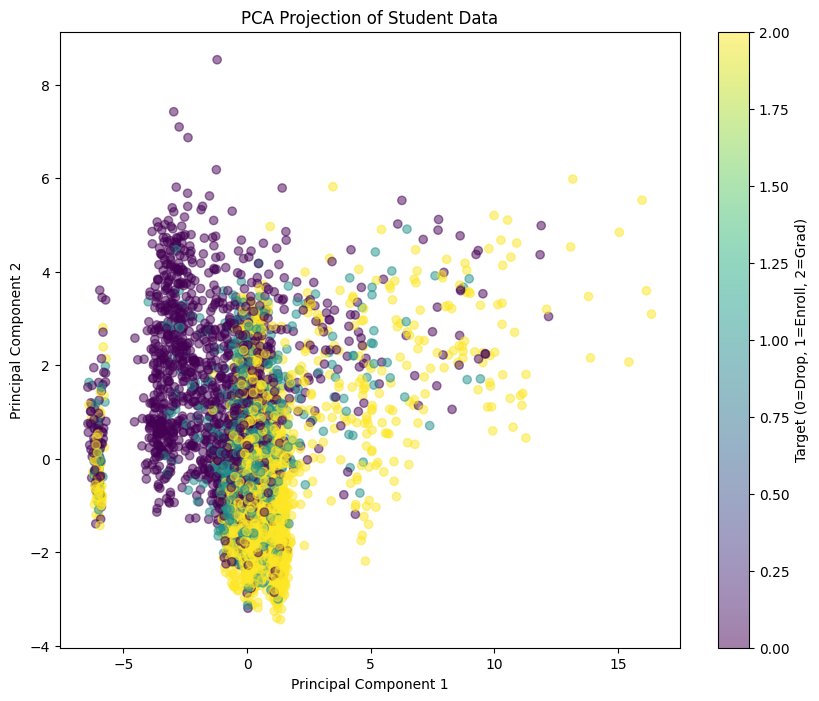

In [ ]:
#with scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
expained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(expained_variance_ratio)
print("Shape of X_pca: ", X_pca.shape)
print("Explined variance ratio: ", expained_variance_ratio)
print("Cumulative_varinace: ", cumulative_variance)

n_components_96 = np.argmax(cumulative_variance >= 0.96) + 1
print("Number of components for 96% variance:", n_components_96)

#new reduced dataset
pca_final = PCA(n_components=n_components_96)
X_pca_final = pca_final.fit_transform(X_scaled)
print("Shape of final X_pca", X_pca_final.shape)
print()

# Visualize PC1 vs PC2
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=copy_data['Target_Num'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target (0=Drop, 1=Enroll, 2=Grad)')
plt.title('PCA Projection of Student Data')
plt.show()

In [ ]:
features = X.columns
print(features)
print(features.shape)

loadings_df = pd.DataFrame(pca_final.components_.T, columns=[f'PC{i+1}' for i in range(pca_final.n_components_)], index=features)

# View top contributors to PC1 and PC2
print("Top features in PC1:")
print(loadings_df['PC1'].sort_values(ascending=False).head(5))

print("\nTop features in PC2:")
print(loadings_df['PC2'].sort_values(ascending=False).head(5))


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## **EXPERIMENTAL METHODS**
**Hypothesis**: MLP trained on PCA reduced features will achieve higher score than AdaBoost.




In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedGroupKFold, cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
#PCA and fully scaled
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2, random_state=42)
#not scaled, original (kinda), no feature reduction
X_train_full, X_test_full, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)
#fully scaled (non PCA)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Lab Diary Storage
lab_diary = []

print("=== STEP 1: INITIAL COMPARISON ===\n")

# --- MODEL A: MLP on PCA Data ---
print("Training MLP on PCA Data...")
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_pca, y_train)
y_pred_mlp = mlp.predict(X_test_pca)
score_mlp = f1_score(y_test, y_pred_mlp, average='macro')

print(f"MLP (PCA) F1 Macro Score: {score_mlp:.4f}")
print(classification_report(y_test, y_pred_mlp, target_names=['Dropout', 'Enrolled', 'Graduate']))

# --- MODEL B: AdaBoost on Full (Non-PCA) Data ---
print("\nTraining AdaBoost...")
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_full, y_train)
y_pred_ada = ada.predict(X_test_full)
score_ada = f1_score(y_test, y_pred_ada, average='macro')

print(f"AdaBoost (Full) F1 Macro Score: {score_ada:.4f}")
print(classification_report(y_test, y_pred_ada, target_names=['Dropout', 'Enrolled', 'Graduate']))

=== STEP 1: INITIAL COMPARISON ===

Training MLP on PCA Data...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (PCA) F1 Macro Score: 0.6342
              precision    recall  f1-score   support

     Dropout       0.76      0.71      0.73       316
    Enrolled       0.38      0.37      0.38       151
    Graduate       0.77      0.82      0.80       418

    accuracy                           0.70       885
   macro avg       0.64      0.63      0.63       885
weighted avg       0.70      0.70      0.70       885


Training AdaBoost...
AdaBoost (Full) F1 Macro Score: 0.6563
              precision    recall  f1-score   support

     Dropout       0.82      0.76      0.79       316
    Enrolled       0.51      0.28      0.36       151
    Graduate       0.75      0.91      0.82       418

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.66       885
weighted avg       0.73      0.75      0.73       885



In [ ]:
# --- MODEL C: AdaBoost on Full (Non-PCA) Data ---
print("Training MLP on scaled Data...")
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
score_mlp = f1_score(y_test, y_pred_mlp, average='macro')

print(f"MLP (PCA) F1 Macro Score: {score_mlp:.4f}")
print(classification_report(y_test, y_pred_mlp, target_names=['Dropout', 'Enrolled', 'Graduate']))


Training MLP on scaled Data...
MLP (PCA) F1 Macro Score: 0.6451
              precision    recall  f1-score   support

     Dropout       0.77      0.71      0.74       316
    Enrolled       0.39      0.40      0.39       151
    Graduate       0.79      0.83      0.81       418

    accuracy                           0.71       885
   macro avg       0.65      0.64      0.65       885
weighted avg       0.71      0.71      0.71       885



Since MLP with PCA gets us the least scored compared to that of adaboost with full non scaled data and MLP with scaled data (not PCA), refining MLP first by increasing layers


In [ ]:
print("\n=== STEP 2: REFINEMENT (SAVING THE MLP) ===")
print("Strategy: Run MLP on FULL SCALED PCA DATA with MORE LAYERS.\n")

mlp_refined = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=11)
print("Training Refined MLP (Deep Network on PCA Data)...")

mlp_refined.fit(X_train_pca, y_train)

y_pred_refined = mlp_refined.predict(X_test_pca)
score_refined = f1_score(y_test, y_pred_refined, average='macro')
print(f"Refined MLP Score: {score_refined:.4f}")
print(classification_report(y_test, y_pred_refined, target_names=['Dropout', 'Enrolled', 'Graduate']))



=== STEP 2: REFINEMENT (SAVING THE MLP) ===
Strategy: Run MLP on FULL SCALED PCA DATA with MORE LAYERS.

Training Refined MLP (Deep Network on PCA Data)...
Refined MLP Score: 0.6369
              precision    recall  f1-score   support

     Dropout       0.78      0.70      0.74       316
    Enrolled       0.38      0.36      0.37       151
    Graduate       0.77      0.84      0.80       418

    accuracy                           0.71       885
   macro avg       0.64      0.63      0.64       885
weighted avg       0.71      0.71      0.71       885



In [ ]:
print("\n=== STEP 2.1: REFINEMENT (SAVING THE MLP) ===")
print("Strategy: Run MLP on FULL SCALED DATA with MORE LAYERS.\n")

mlp_refined = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=11)
print("Training Refined MLP (Deep Network on Full Data)...")
mlp_refined.fit(X_train_scaled, y_train)

y_pred_refined = mlp_refined.predict(X_test_scaled)
score_refined = f1_score(y_test, y_pred_refined, average='macro')
print(f"Refined MLP Score: {score_refined:.4f}")
print(classification_report(y_test, y_pred_refined, target_names=['Dropout', 'Enrolled', 'Graduate']))



=== STEP 2.1: REFINEMENT (SAVING THE MLP) ===
Strategy: Run MLP on FULL SCALED DATA with MORE LAYERS.

Training Refined MLP (Deep Network on Full Data)...
Refined MLP Score: 0.6462
              precision    recall  f1-score   support

     Dropout       0.76      0.76      0.76       316
    Enrolled       0.40      0.33      0.36       151
    Graduate       0.79      0.84      0.82       418

    accuracy                           0.73       885
   macro avg       0.65      0.64      0.65       885
weighted avg       0.71      0.73      0.72       885



got a bad score of like 0.23, but was error becuase I was passing non scaled data, after passing scaled data (all features non PCA), got better result of 0.64 which is bettter than with PCA but still less than adaboost.
So now trying with gradient Boost


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
print("\n=== STEP 3: Testing with Gradient Boost to see if it can beat adaboost ===")

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=11)

gb.fit(X_train_full, y_train)
y_pred_gb = gb.predict(X_test_full)
score_gb = f1_score(y_test, y_pred_gb, average='macro')

print(f"Gradient Boost F1 Macro Score: {score_gb:.4f}")
print(classification_report(y_test, y_pred_gb, target_names=['Dropout', 'Enrolled', 'Graduate']))


=== STEP 3: Testing with Gradient Boost to see if it can beat adaboost ===
Gradient Boost F1 Macro Score: 0.6812
              precision    recall  f1-score   support

     Dropout       0.85      0.76      0.80       316
    Enrolled       0.49      0.34      0.40       151
    Graduate       0.78      0.92      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



Gradient Boost as winner, with highesst score of 0.68, my hypotheis was wrong